In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [69]:
df=pd.read_csv("C:/Users/Student/Desktop/2023_nba_player_stats.csv")
df.head(5)

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,DD2,TD3,+/-,HR,Accel_X,Accel_Y,Accel_Z,Gyro_X,Gyro_Y,Gyro_Z
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,31,1,470,70,0.12,-0.34,0.56,0.78,-0.67,0.45
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,39,1,424,72,0.23,0.45,-0.12,1.23,0.67,-0.56
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,36,10,128,88,-0.15,0.67,0.43,-1.34,1.23,0.34
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,3,0,149,75,0.45,-0.82,0.12,0.67,-0.78,1.23
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,46,6,341,92,0.34,0.23,-0.67,0.45,1.12,-0.45


In [70]:
df['FP'] =df[['PTS','AST','STL','HR']].mean(axis=1)

In [71]:
features=['PTS','AST','STL','HR','Accel_X','Accel_Y','Accel_Z']
X=df[features]
y=df['FP']

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [74]:
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Regressor MSE: {mse:.2f}")

Random Forest Regressor MSE: 218.44


In [75]:
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf_regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
    Feature  Importance
0      PTS    0.971982
1      AST    0.017268
2      STL    0.008586
3       HR    0.000606
5  Accel_Y    0.000547
4  Accel_X    0.000524
6  Accel_Z    0.000487


In [76]:
df['Score'] = np.dot(df[features], rf_regressor.feature_importances_)

In [77]:
df['Score_Normalized'] = 100 * (df['Score'] - df['Score'].min()) / (df['Score'].max() - df['Score'].min())

In [78]:
print(df[['PName','Score_Normalized']].head())

                     PName  Score_Normalized
0             Jayson Tatum        100.000000
1              Joel Embiid         98.059263
2              Luka Doncic         96.255867
3  Shai Gilgeous-Alexander         96.003983
4    Giannis Antetokounmpo         88.085025


In [79]:
df_sorted = df.sort_values(by='Score_Normalized', ascending=False)

In [80]:
color_palette = sns.color_palette("husl", 30)

C:\Users\Student\AppData\Local\Temp\ipykernel_4212\2278865146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x='Score_Normalized', y='PName', data=df_sorted.head(30),  palette=color_palette  )


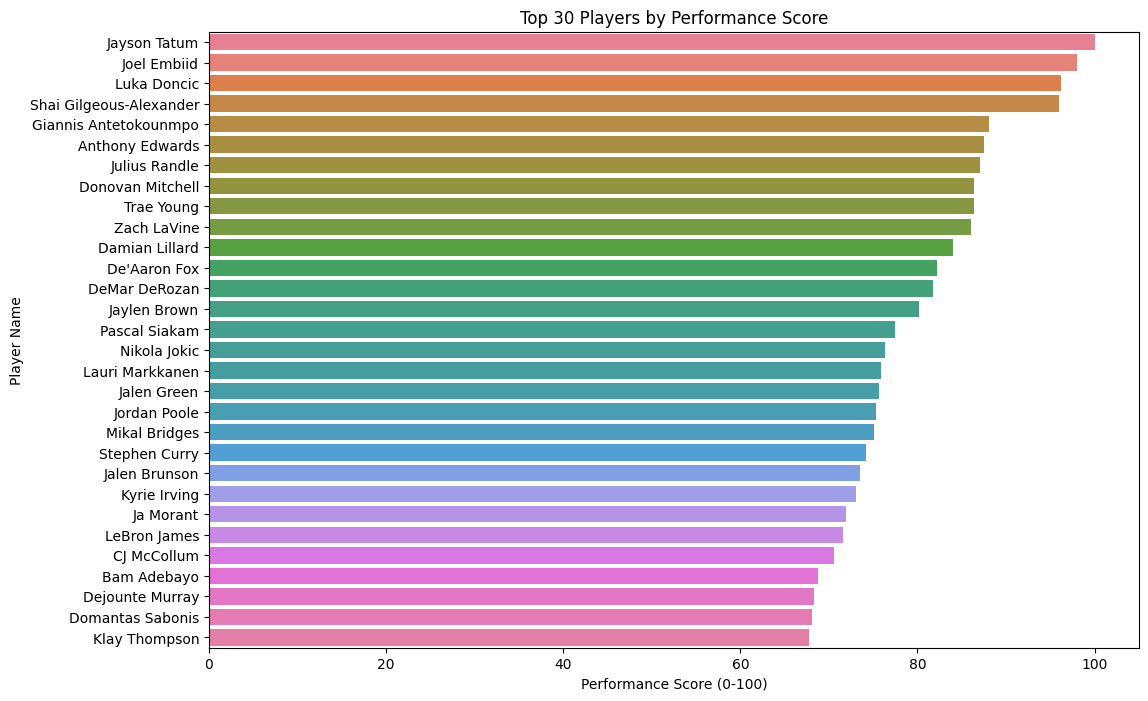

In [81]:
plt.figure(figsize=(12, 8))
sns.barplot( x='Score_Normalized', y='PName', data=df_sorted.head(30),  palette=color_palette  )
plt.title("Top 30 Players by Performance Score")
plt.xlabel("Performance Score (0-100)")
plt.ylabel("Player Name")
plt.show()

C:\Users\Student\AppData\Local\Temp\ipykernel_4212\1917207403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='coolwarm')


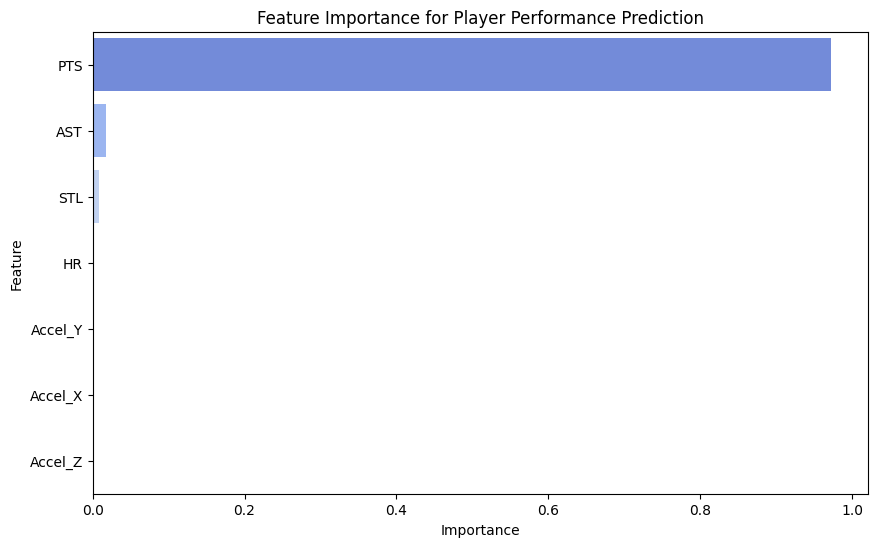

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='coolwarm')
plt.title("Feature Importance for Player Performance Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [85]:
print(feature_importances)

   Feature  Importance
0      PTS    0.971982
1      AST    0.017268
2      STL    0.008586
3       HR    0.000606
5  Accel_Y    0.000547
4  Accel_X    0.000524
6  Accel_Z    0.000487


In [88]:
feature_importances = pd.DataFrame({'Feature': features,'Importance': rf_regressor.feature_importances_})

C:\Users\Student\AppData\Local\Temp\ipykernel_4212\4007103002.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.sort_values(by='Importance', ascending=False),palette='coolwarm')


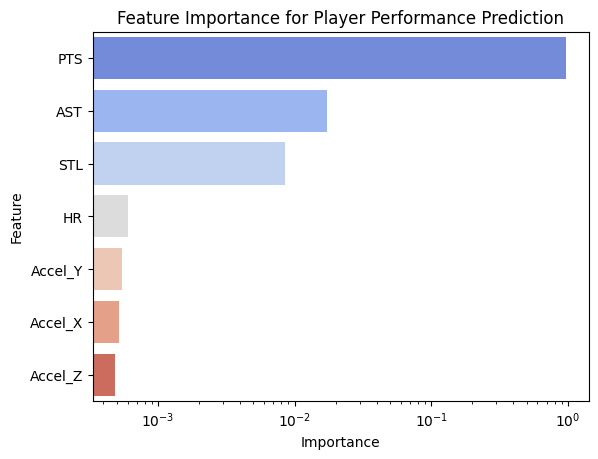

In [91]:
sns.barplot(x='Importance', y='Feature', data=feature_importances.sort_values(by='Importance', ascending=False),palette='coolwarm')
plt.title("Feature Importance for Player Performance Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.xscale('log')
plt.show()